In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d 'mohamedchahed/dog-breeds'

Dataset URL: https://www.kaggle.com/datasets/mohamedchahed/dog-breeds
License(s): CC0-1.0
100% 82.0M/82.3M [00:00<00:00, 157MB/s]
100% 82.3M/82.3M [00:00<00:00, 128MB/s]


In [4]:
!unzip dog-breeds.zip

Archive:  dog-breeds.zip
  inflating: dog-breeds/beagle/beagle1.jpg  
  inflating: dog-breeds/beagle/beagle10.jpg  
  inflating: dog-breeds/beagle/beagle101.jpg  
  inflating: dog-breeds/beagle/beagle105.jpg  
  inflating: dog-breeds/beagle/beagle106.jpg  
  inflating: dog-breeds/beagle/beagle108.jpg  
  inflating: dog-breeds/beagle/beagle109.jpg  
  inflating: dog-breeds/beagle/beagle11.jpg  
  inflating: dog-breeds/beagle/beagle110.jpg  
  inflating: dog-breeds/beagle/beagle112.jpg  
  inflating: dog-breeds/beagle/beagle114.jpg  
  inflating: dog-breeds/beagle/beagle115.jpg  
  inflating: dog-breeds/beagle/beagle116.jpg  
  inflating: dog-breeds/beagle/beagle118.jpg  
  inflating: dog-breeds/beagle/beagle12.jpg  
  inflating: dog-breeds/beagle/beagle13.jpg  
  inflating: dog-breeds/beagle/beagle14.jpg  
  inflating: dog-breeds/beagle/beagle15.jpg  
  inflating: dog-breeds/beagle/beagle16.jpg  
  inflating: dog-breeds/beagle/beagle17.jpg  
  inflating: dog-breeds/beagle/beagle18.jpg  

In [5]:
import os
import random
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt #use for image display
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, BatchNormalization
from tensorflow.keras.models import Sequential

from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import SGD #stochistic gradient model Algo (back propagation)
from tensorflow.keras.callbacks import LearningRateScheduler #learning rate


In [6]:
# Creating ImageDataGenerator instance to Augu ment,split and then pass our images to the model
data_gen = ImageDataGenerator(rescale = 1./255 ,#scale between 0-255
                              width_shift_range = 0.2 ,
                              validation_split=0.1,
                              height_shift_range = 0.2 ,
                              shear_range = 0.2 ,
                              horizontal_flip = True ,
                              vertical_flip = True,
                              zoom_range = 0.2)#craete a new data Argument from existing data #
#send 10 % to validation and 90% to traning data  

In [7]:
training_data = data_gen.flow_from_directory('/content/dog-breeds',
                                            target_size = (224,224),
                                            class_mode='categorical',
                                            subset = 'training'
                                            )
validation_data = data_gen.flow_from_directory('/content/dog-breeds',
                                              target_size = (224,224),
                                              class_mode='categorical',
                                              subset = 'validation')

Found 490 images belonging to 8 classes.
Found 51 images belonging to 8 classes.


In [8]:
#pretrained model - resonatemode pretarainde model inception v3
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O //content/sample_data/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2024-08-06 17:44:47--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.0.91, 172.217.7.59, 172.217.12.27, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.0.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘//content/sample_data/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

//content/sample_da 100%[===================>]  83.84M   133MB/s    in 0.6s    

2024-08-06 17:44:48 (133 MB/s) - ‘//content/sample_data/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [9]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

local_weights_file = '/content/sample_data/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'


pre_trained_model = InceptionV3(input_shape = (224, 224, 3),
                                include_top = False,
                                weights = None)

pre_trained_model.load_weights(local_weights_file)


for layer in pre_trained_model.layers:
    layer.trainable = False

In [10]:

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

AttributeError: 'Concatenate' object has no attribute 'output_shape'

In [12]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

local_weights_file = '/content/sample_data/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (224, 224, 3),
                                include_top = False,
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')

last_layer_input_shapes = [input_tensor.shape for input_tensor in last_layer.input]
print('last layer input shapes: ', last_layer_input_shapes)

last_output = last_layer.output

last layer input shapes:  [(None, 12, 12, 192), (None, 12, 12, 192), (None, 12, 12, 192), (None, 12, 12, 192)]


In [13]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                        
x = layers.Dense  (8, activation='softmax')(x)

model = Model(pre_trained_model.input, x)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_188 (Conv2D)       │ (None, 111, 111, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_188   │ (None, 111, 111, 32)   │             96 │ conv2d_188[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_188            │ (None, 111, 111, 32)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_189 (Conv2D)       │ (None, 109, 109, 32)   │          9,216 │ activation_188[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_189   │ (None, 109, 109, 32)   │             96 │ conv2d_189[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_189            │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_190 (Conv2D)       │ (None, 109, 109, 64)   │         18,432 │ activation_189[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_190   │ (None, 109, 109, 64)   │            192 │ conv2d_190[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_190            │ (None, 109, 109, 64)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 54, 54, 64)     │              0 │ activation_190[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_191 (Conv2D)       │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_191   │ (None, 54, 54, 80)     │            240 │ conv2d_191[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_191            │ (None, 54, 54, 80)     │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_192 (Conv2D)  

 Total params: 122,230,696 (466.27 MB)

 Trainable params: 113,255,432 (432.04 MB)

 Non-trainable params: 8,975,264 (34.24 MB)

In [14]:
def step_decay(epoch):
    
    initial_alpha = 0.01
    factor = 0.5
    drop_every_epoch = 5
    alpha = initial_alpha * (factor ** np.floor((1+epoch) / drop_every_epoch))
    return float(alpha)

callbacks = [LearningRateScheduler(step_decay)]


print("[INFO] compiling model...")

opt = SGD(learning_rate=0.01,momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

[INFO] compiling model...


In [15]:

history = model.fit(
            training_data,
            validation_data = validation_data,
            epochs = 20,
            callbacks=callbacks,
            verbose = 1)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 100s 5s/step - accuracy: 0.1694 - loss: 3.6727 - val_accuracy: 0.1961 - val_loss: 1.9091 - learning_rate: 0.0100
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 134s 5s/step - accuracy: 0.3233 - loss: 1.7524 - val_accuracy: 0.7647 - val_loss: 1.1228 - learning_rate: 0.0100
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 141s 5s/step - accuracy: 0.5953 - loss: 1.1118 - val_accuracy: 0.6863 - val_loss: 0.7627 - learning_rate: 0.0100
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - accuracy: 0.7884 - loss: 0.6375 - val_accuracy: 0.8039 - val_loss: 0.5478 - learning_rate: 0.0100
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 90s 5s/step - accuracy: 0.8126 - loss: 0.6414 - val_accuracy: 0.8039 - val_loss: 0.5010 - learning_rate: 0.0050
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 84s 5s/step - accuracy: 0.8421 - loss: 0.4200 - val_accuracy: 0.8235 - val_loss: 0.5253 - learning_rate: 0.0050
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - accuracy: 0.8763 - loss: 0.3321 - val_accuracy: 0.7451

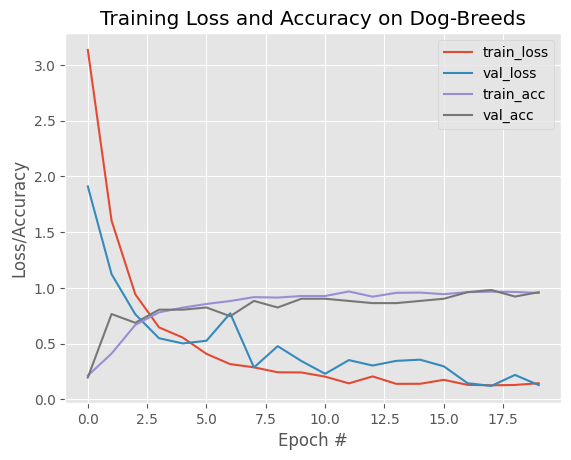

In [16]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dog-Breeds")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step


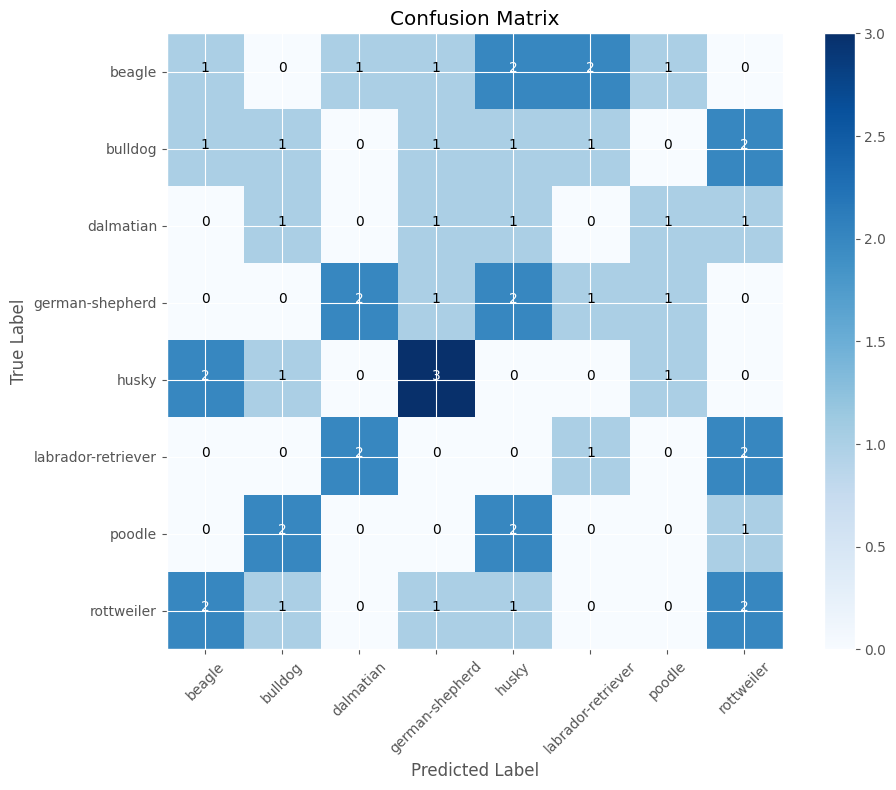

In [17]:

from sklearn.metrics import confusion_matrix
y_pred = model.predict(validation_data)


y_pred_labels = np.argmax(y_pred, axis=1)


true_labels = validation_data.classes

conf_matrix = confusion_matrix(true_labels, y_pred_labels)

plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

tick_marks = np.arange(len(validation_data.class_indices))
plt.xticks(tick_marks, validation_data.class_indices, rotation=45)
plt.yticks(tick_marks, validation_data.class_indices)

thresh = conf_matrix.max() / 2.0
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.colorbar()
plt.tight_layout()
plt.show()


In [40]:

model.save('/content/fine_tuned_inception.keras')

!ls /content

dog-breeds	drive			 fine_tuned_inception.keras  sample_data
dog-breeds.zip	fine_tuned_inception.h5  kaggle.json


In [41]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [19]:

from tensorflow.keras.models import load_model

loaded_model = load_model('/content/drive/MyDrive/fine_tuned_inception.h5')

In [29]:
from tensorflow.keras.preprocessing import image

def predict_and_display(model, class_labels, img_path, true_class=None):
    
    img = image.load_img(img_path, target_size=(224, 224))

    
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]

    
    predictions = loaded_model.predict(img_array)
    predicted_class = np.argmax(predictions)
    confidence_level = np.max(predictions)

    
    predicted_class_name = class_labels[predicted_class]

    plt.imshow(img)
    plt.axis('off')

    if true_class:
        plt.title(f'Predicted Class: {predicted_class_name}, True Class: {true_class},conf:{confidence_level}%')
    else:
        plt.title(f'Predicted Class: {predicted_class_name}')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


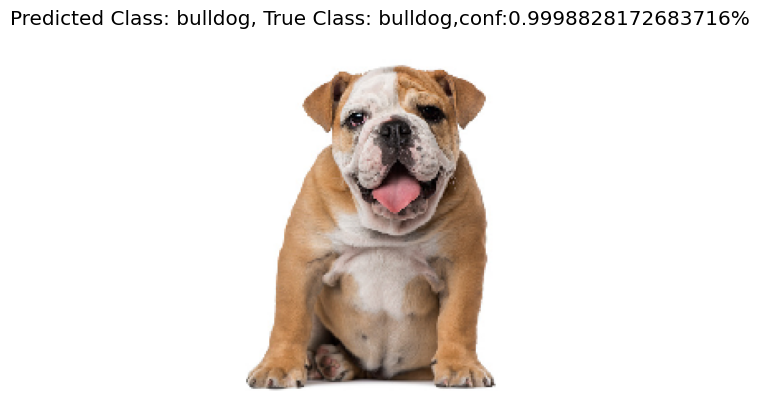

In [30]:

class_labels = ['beagle', 'bulldog', 'dalmatian', 'german-shepherd', 'husky', 'labrador-retriever', 'poodle', 'rottweiler']
predict_and_display(model, class_labels, '/content/dog-breeds/bulldog/bulldog108.jpg', true_class='bulldog')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


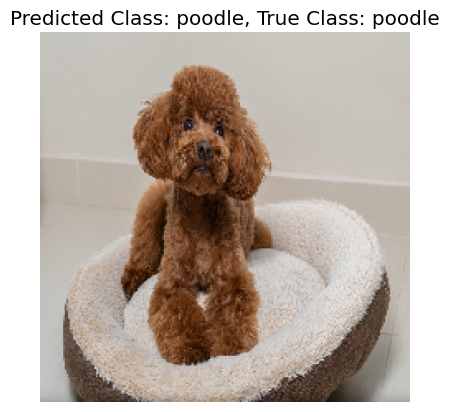

In [22]:

predict_and_display(model, class_labels, '/content/dog-breeds/poodle/poodle116.jpg', true_class="poodle")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


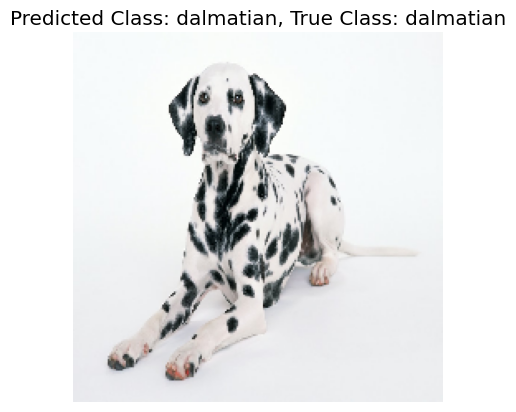

In [23]:

predict_and_display(model, class_labels, '/content/dog-breeds/dalmatian/dalmatian20.jpg', true_class="dalmatian")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


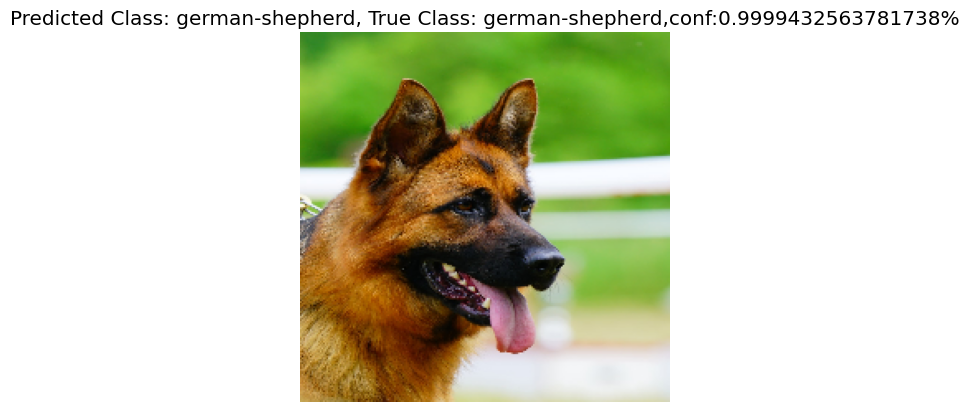

In [31]:

class_labels = ['beagle', 'bulldog', 'dalmatian', 'german-shepherd', 'husky', 'labrador-retriever', 'poodle', 'rottweiler']
predict_and_display(model, class_labels, '/content/dog-breeds/german-shepherd/german-shepherd104.jpg', true_class='german-shepherd')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


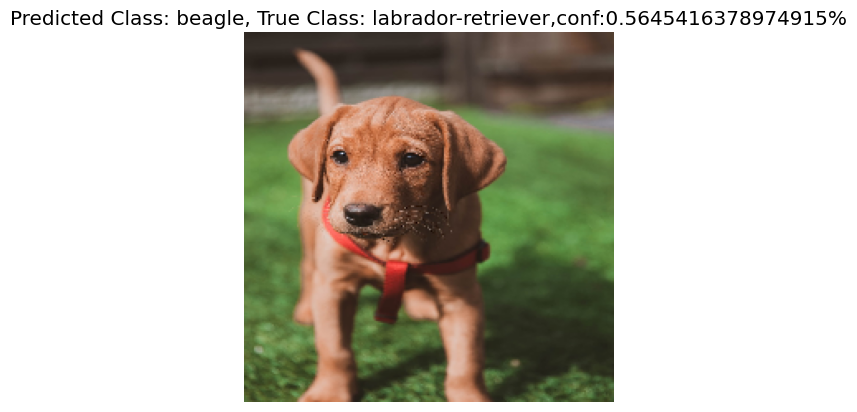

In [42]:

predict_and_display(model, class_labels, '/content/dog-breeds/labrador-retriever/labrador-retriever104.jpg', true_class="labrador-retriever")